<a href="https://colab.research.google.com/github/grclshrm/elective-2/blob/main/ERMITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ermita.csv to ermita (2).csv


<ipython-input-7-bfdf5ff1227b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country_enc'] = le_country.fit_transform(df_clean['country'])
<ipython-input-7-bfdf5ff1227b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['title_enc'] = le_title.fit_transform(df_clean['title'])
<ipython-input-7-bfdf5ff1227b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

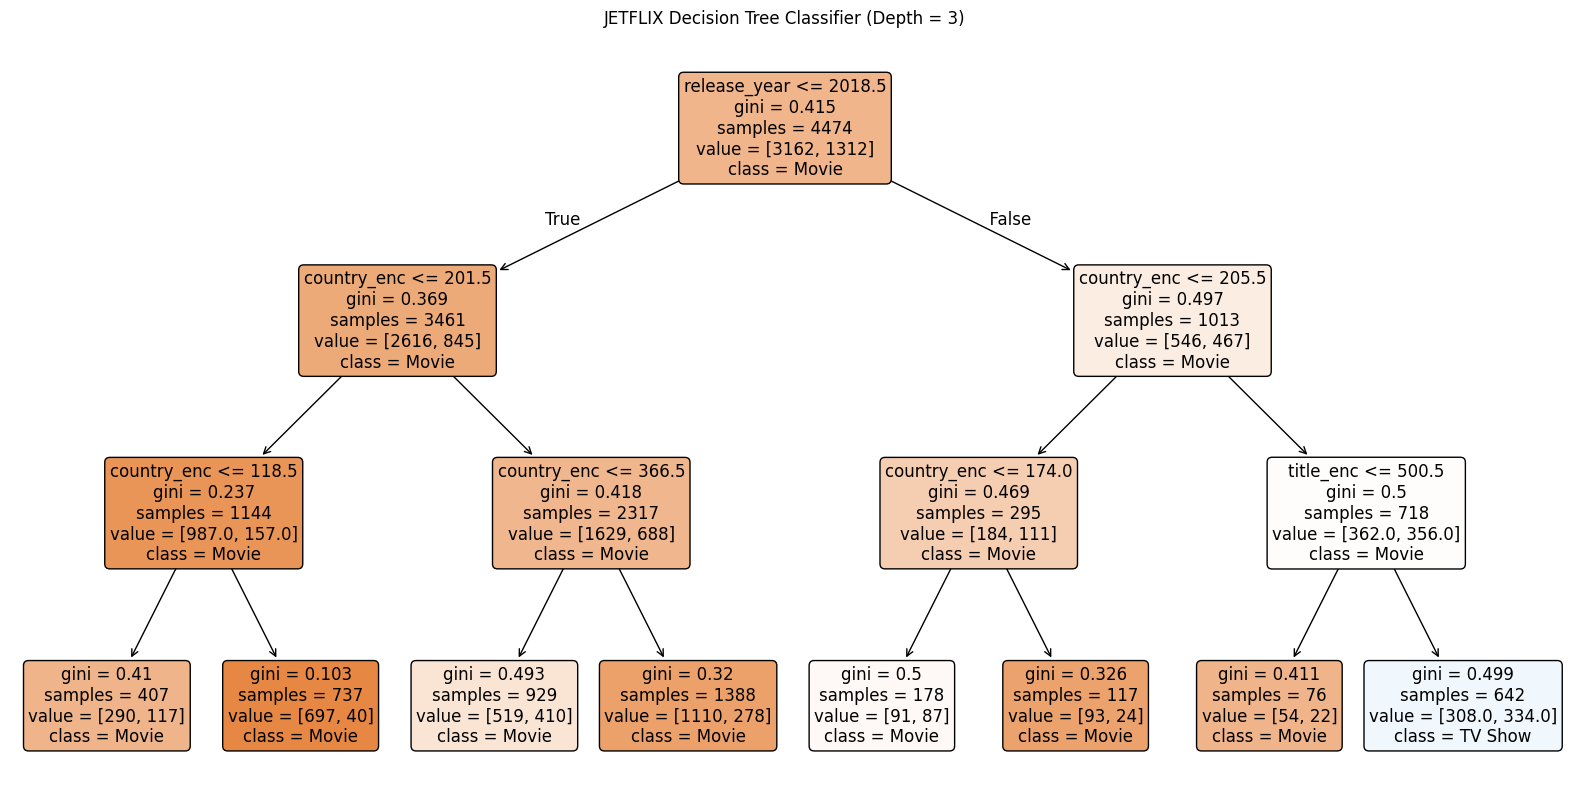

In [ ]:






import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("ermita.csv", delimiter="\t")
df_clean = df.dropna(subset=['title', 'country', 'release_year', 'type'])


le_country = LabelEncoder()
le_title = LabelEncoder()
le_type = LabelEncoder()

df_clean['country_enc'] = le_country.fit_transform(df_clean['country'])
df_clean['title_enc'] = le_title.fit_transform(df_clean['title'])
df_clean['type_enc'] = le_type.fit_transform(df_clean['type'])


X = df_clean[['country_enc', 'release_year', 'title_enc']]
y = df_clean['type_enc']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=['country_enc', 'release_year', 'title_enc'],
          class_names=le_type.classes_,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("JETFLIX Decision Tree Classifier (Depth = 3)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-9-e2f948400b95>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


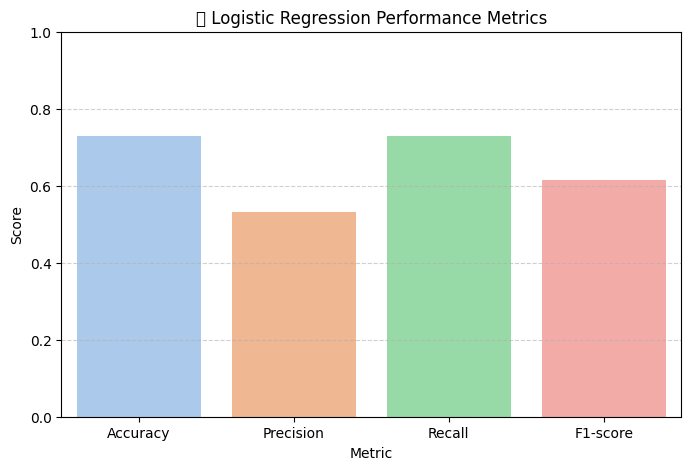

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create DataFrame for chart
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [accuracy, precision, recall, f1]
})

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='pastel')
plt.title("📊 Logistic Regression Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
